In [6]:
!pip install catboost

   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.4 MB 1.4 MB/s eta 0:01:11
   ---------------------------------------- 0.8/102.4 MB 1.3 MB/s eta 0:01:17
    --------------------------------------- 1.3/102.4 MB 1.4 MB/s eta 0:01:13
    --------------------------------------- 1.6/102.4 MB 1.4 MB/s eta 0:01:11
    --------------------------------------- 1.8/102.4 MB 1.5 MB/s eta 0:01:09
    --------------------------------------- 2.4/102.4 MB 1.6 MB/s eta 0:01:04
   - -------------------------------------- 2.9/102.4 MB 1.6 MB/s eta 0:01:01
   - -------------------------------------- 3.1/102.4 MB 1.7 MB/s eta 0:01:00
   - -------------------------------------- 3.4/102.4 MB 1.7 MB/s eta 0:01:00
   - -------------------------------------- 3.9/102.4 MB 1.7 MB/s eta 0:00:58
   - --

# Importing Libraries

In [4]:
!pip install missingno
!pip install plotly
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 204.6 kB/s eta 0:00:46
   -- ------------------------------------- 0.5/9.8 MB 204.6 kB/s eta 0:00:46
   -- ----------

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

# Reading CSV File & Data Manipulation

In [ ]:
df = pd.read_csv('/content/Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
df.fillna(df["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df["InternetService"].describe(include=['object', 'bool'])

,InternetService
count,7043
unique,3
top,Fiber optic
freq,3096


In [ ]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [ ]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

,Churn
gender,
Female,2549
Male,2625


In [ ]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

,Churn
gender,
Female,939
Male,930


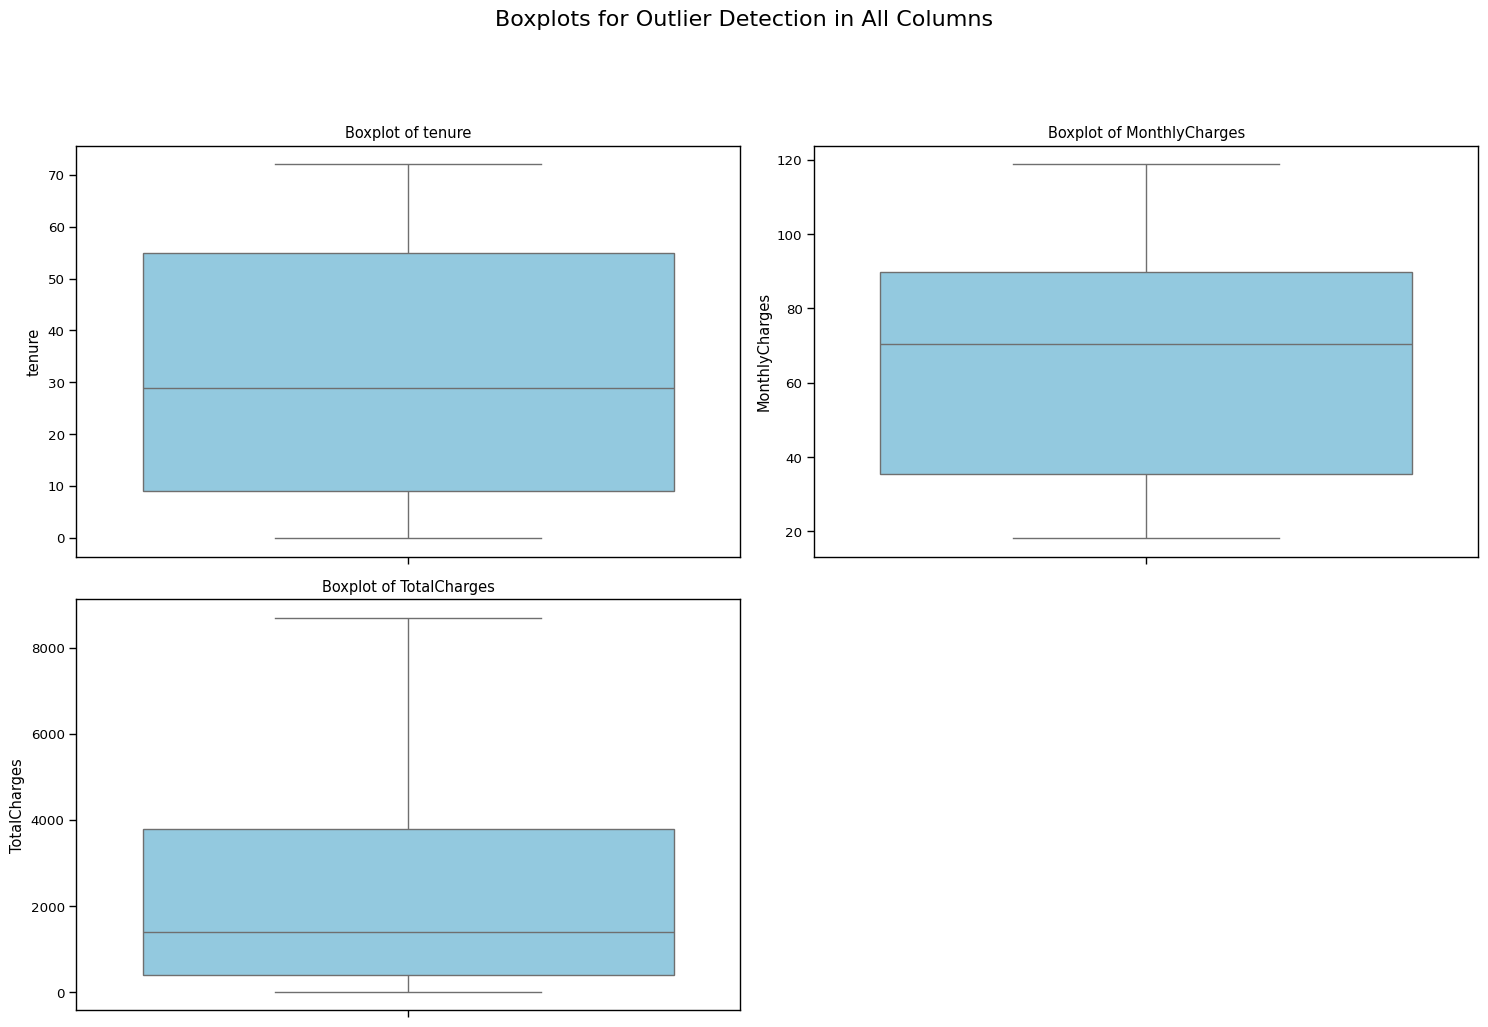

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def detect_outliers_iqr(dataframe):
    outlier_indices = {}  # Dictionary to store outlier indices for each column

    for column in dataframe.columns:
        if dataframe[column].dtype in ['int64', 'float64']:  # Only apply to numerical columns
            Q1 = np.percentile(dataframe[column], 25)  # 25th percentile
            Q3 = np.percentile(dataframe[column], 75)  # 75th percentile
            IQR = Q3 - Q1  # Interquartile range
            lower_bound = Q1 - 1.5 * IQR  # Lower bound
            upper_bound = Q3 + 1.5 * IQR  # Upper bound

            # Identify outlier indices
            outliers = np.where((dataframe[column] < lower_bound) | (dataframe[column] > upper_bound))[0]

            # Store outliers for the column
            if len(outliers) > 0:
                outlier_indices[column] = outliers.tolist()

    return outlier_indices

# Detect outliers using IQR
iqr_outliers_all_columns = detect_outliers_iqr(df)

# Plot boxplots for each numerical column to visualize outliers
plt.figure(figsize=(15, 50))

for i, column in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(len(df.columns) // 2 + 1, 2, i + 1)  # Create subplots for multiple boxplots
    sns.boxplot(y=df[column], color='skyblue')
    plt.title(f"Boxplot of {column}")
    plt.ylabel(column)
    plt.tight_layout()

plt.suptitle("Boxplots for Outlier Detection in All Columns", y=1.02, fontsize=16)
plt.show()

# Print outliers detected for each column
for column, outliers in iqr_outliers_all_columns.items():
    print(f"IQR Outliers in {column}: {outliers}")


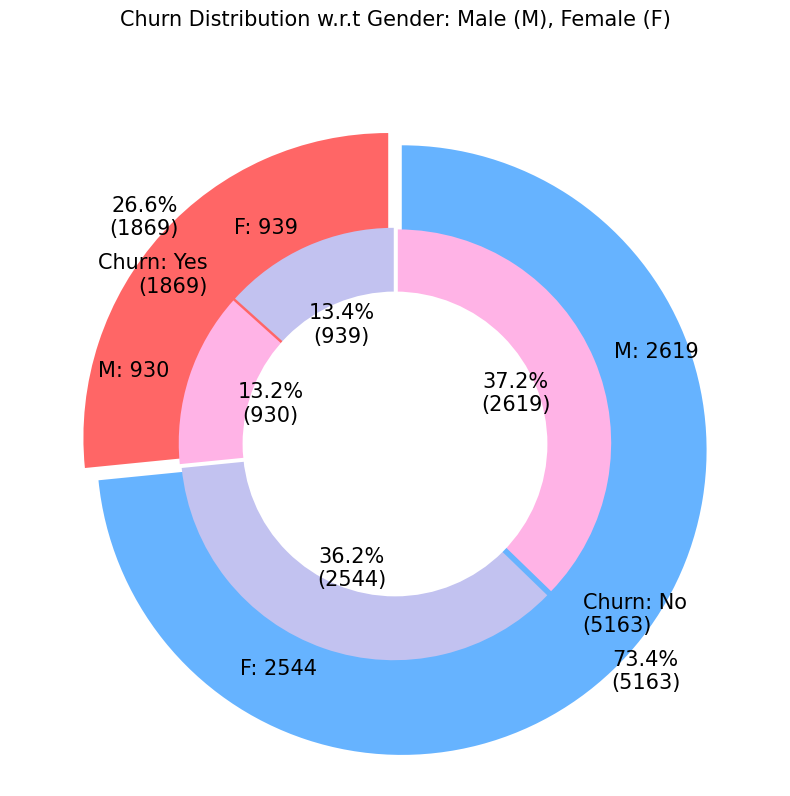

In [ ]:
import matplotlib.pyplot as plt

# Data
labels = ["Churn: Yes", "Churn: No"]
values = [1869, 5163]
labels_gender = ["F: 939", "M: 930", "F: 2544", "M: 2619"]
sizes_gender = [939, 930, 2544, 2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0', '#ffb3e6', '#c2c2f0', '#ffb3e6']
explode = (0.3, 0.3)
explode_gender = (0.1, 0.1, 0.1, 0.1)
textprops = {"fontsize": 15}

# Custom function to display both percentage and value
def autopct_format(pct, values):
    total = sum(values)
    val = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({val})'

# Plot
plt.figure(figsize=(8, 8))
plt.pie(
    values,
    labels=[f'{label}\n({value})' for label, value in zip(labels, values)],
    autopct=lambda pct: autopct_format(pct, values),
    pctdistance=1.08,
    labeldistance=0.8,
    colors=colors,
    startangle=90,
    frame=True,
    explode=explode,
    radius=10,
    textprops=textprops,
    counterclock=True,
)

plt.pie(
    sizes_gender,
    labels=labels_gender,
    autopct=lambda pct: autopct_format(pct, sizes_gender),
    colors=colors_gender,
    startangle=90,
    explode=explode_gender,
    radius=7,
    textprops=textprops,
    counterclock=True,
)

# Draw circle
centre_circle = plt.Circle((0, 0), 5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Title
plt.title('Churn Distribution w.r.t Gender: Male (M), Female (F)', fontsize=15, y=1.1)

# Show plot
plt.axis('equal')
plt.tight_layout()
plt.show()


In [ ]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [ ]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
 df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

,,count
InternetService,Churn,
DSL,No,993
Fiber optic,No,910
No,No,722
Fiber optic,Yes,633
DSL,Yes,240
No,Yes,57


In [ ]:
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

,,count
InternetService,Churn,
DSL,No,969
Fiber optic,No,889
No,No,691
Fiber optic,Yes,664
DSL,Yes,219
No,Yes,56


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:

color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

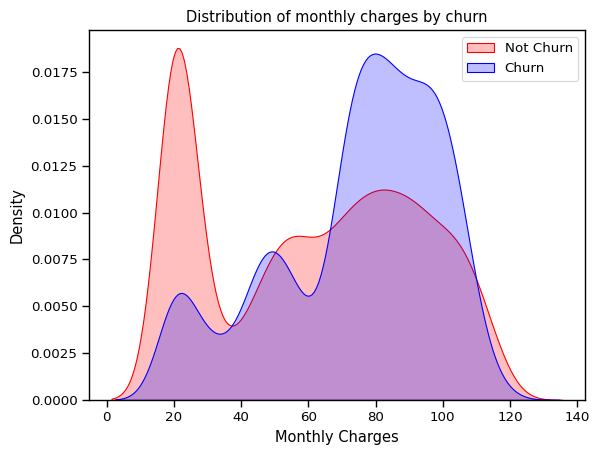

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

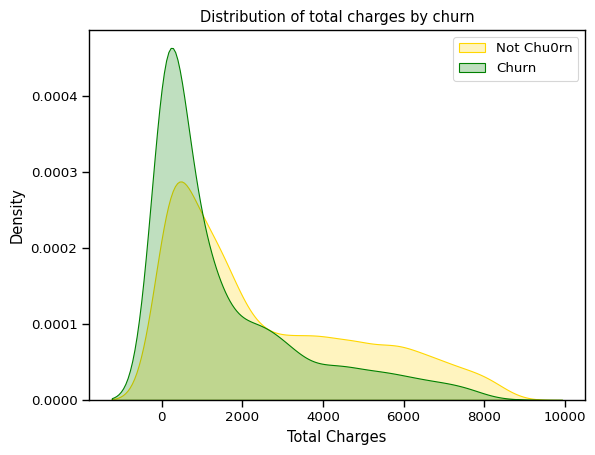

In [ ]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [ ]:
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

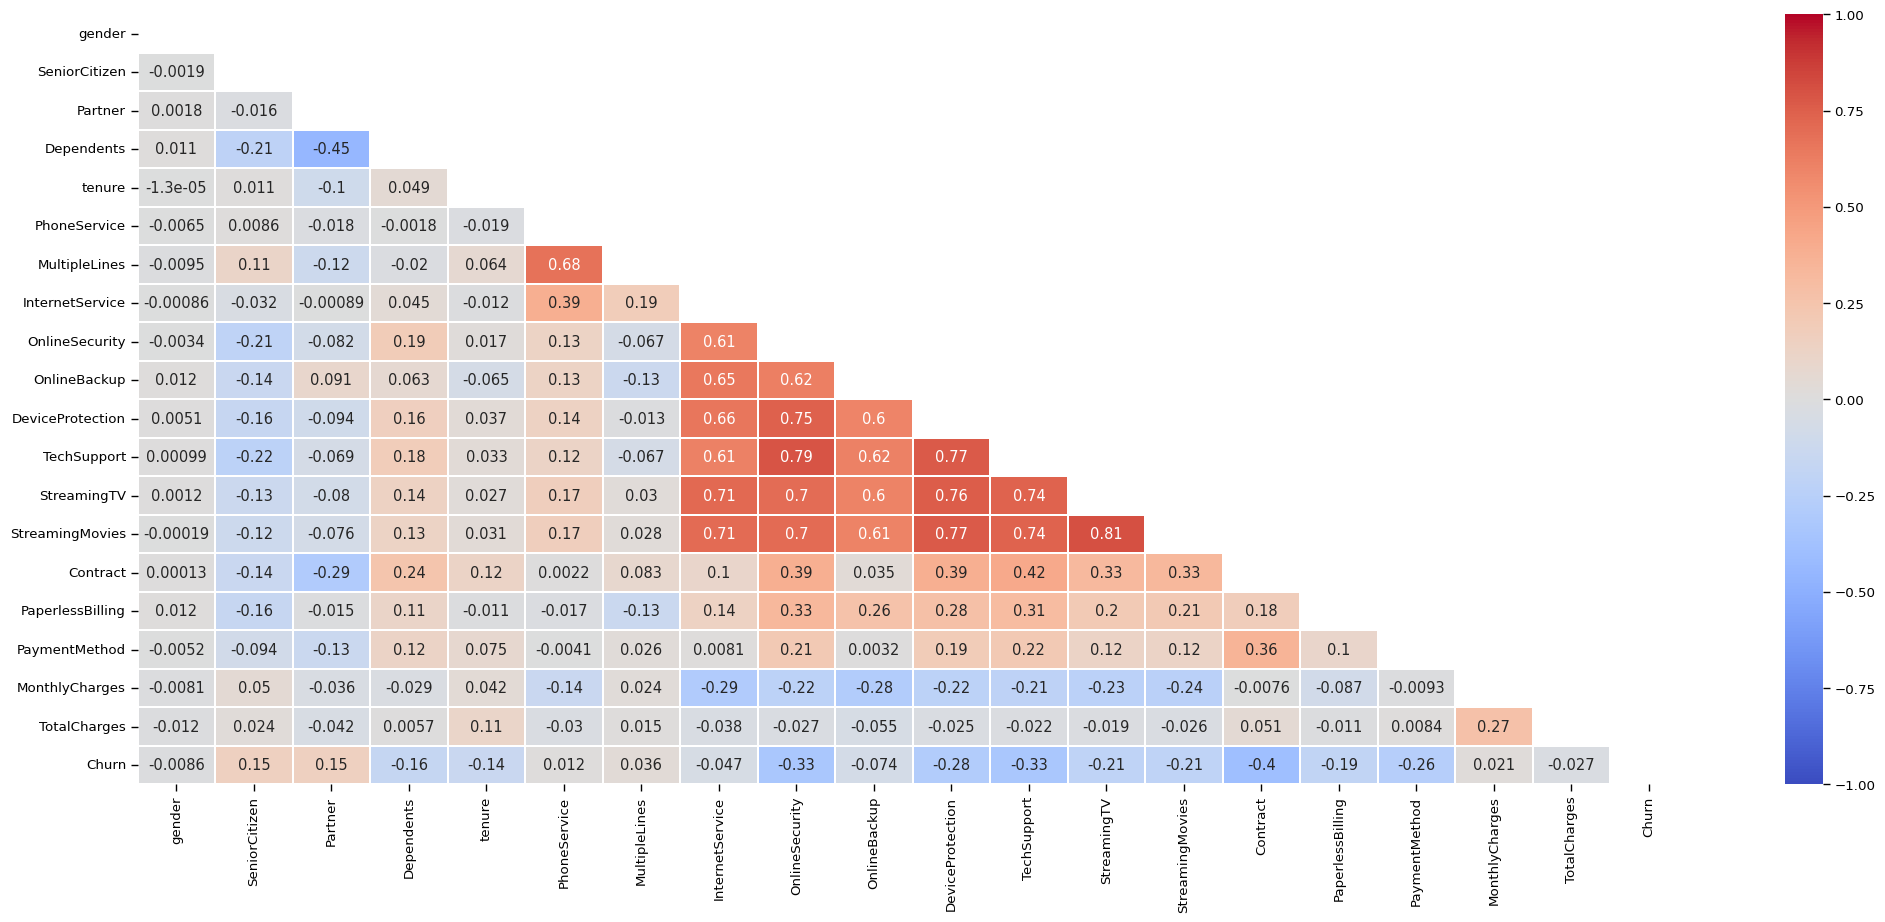

In [ ]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [ ]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

,Churn
Churn,1.000000
MonthlyCharges,0.193356
PaperlessBilling,0.191825
SeniorCitizen,0.150889
PaymentMethod,0.107062
MultipleLines,0.038037
PhoneService,0.011942
gender,-0.008612
StreamingTV,-0.036581
StreamingMovies,-0.038492


<Figure size 1400x700 with 0 Axes>

In [ ]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [ ]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

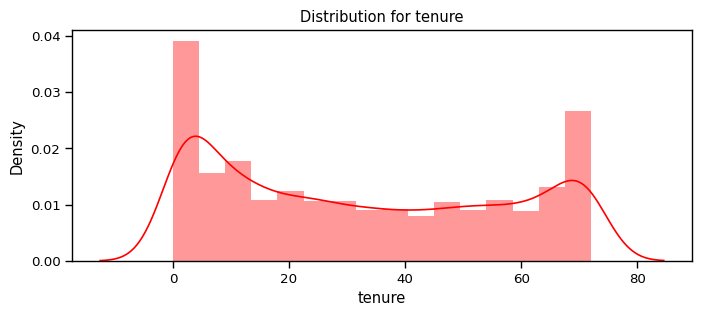

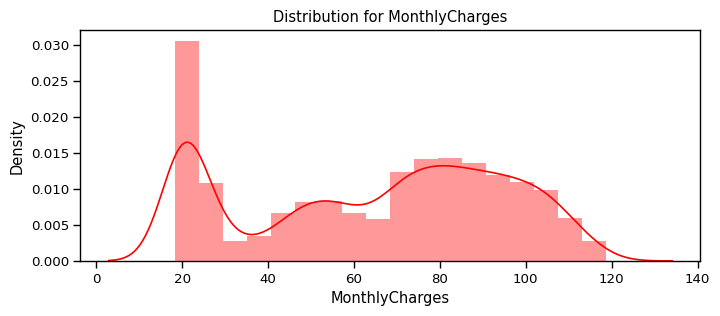

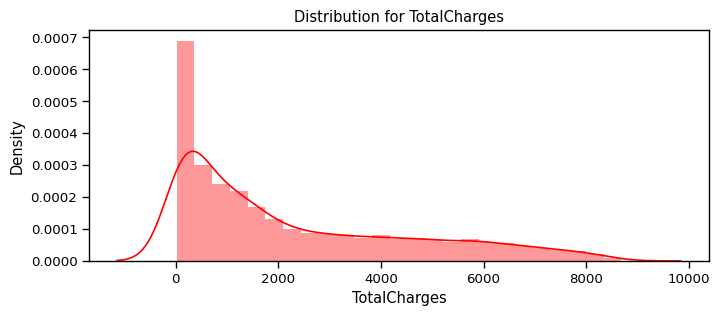

In [ ]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

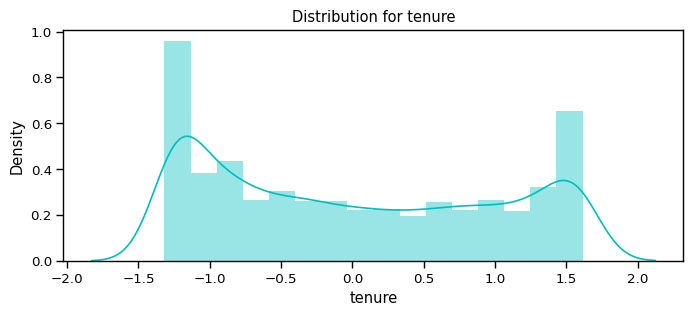

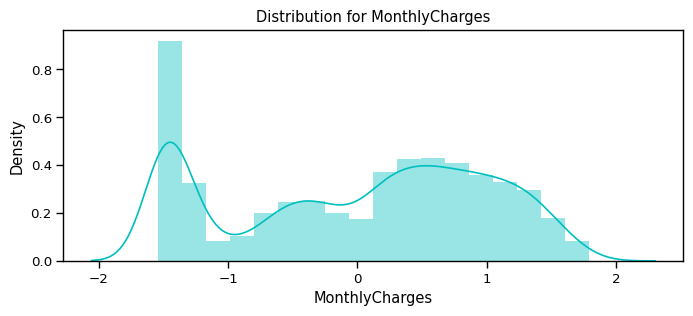

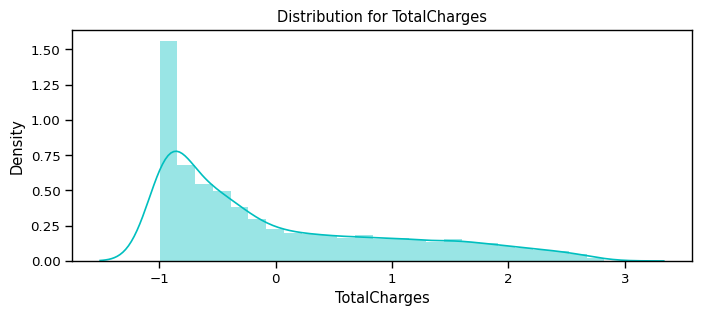

In [ ]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

In [ ]:
fig = go.Figure()

churn_no_female = 965
churn_no_male = 992
churn_yes_female = 219
churn_yes_male = 240

# DSL
fig.add_trace(go.Bar(
    x=['Female (No Churn)', 'Male (No Churn)', 'Female (Churn)', 'Male (Churn)'],
    y=[churn_no_female, churn_no_male, churn_yes_female, churn_yes_male],
    name='DSL',
    text=[f"{(y/sum([churn_no_female, churn_no_male]))*100:.1f}%" for y in [churn_no_female, churn_no_male, churn_yes_female, churn_yes_male]],
    textposition='auto'
))

# Fiber Optic
fig.add_trace(go.Bar(
    x=['Female (No Churn)', 'Male (No Churn)', 'Female (Churn)', 'Male (Churn)'],
    y=[889, 910, 664, 633],
    name='Fiber Optic',
    text=[f"{(y/sum([889, 910]))*100:.1f}%" for y in [889, 910, 664, 633]],
    textposition='auto'
))

# No Internet
fig.add_trace(go.Bar(
    x=['Female (No Churn)', 'Male (No Churn)', 'Female (Churn)', 'Male (Churn)'],
    y=[690, 717, 56, 57],
    name='No Internet',
    text=[f"{(y/sum([690, 717]))*100:.1f}%" for y in [690, 717, 56, 57]],
    textposition='auto'
))

fig.update_layout(
    title_text="Churn Distribution by Internet Service and Gender",
    barmode='group',
    width=1000,
    height=500,
    xaxis_title="Category",
    yaxis_title="Count"
)

fig.show()


In [ ]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [ ]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])



In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values in X_train and X_test with the mean of each feature
imputer = SimpleImputer(strategy='mean')
X_train= imputer.fit_transform(X_train)
X_test= imputer.transform(X_test)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7586370089919545


In [ ]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1552
           1       0.55      0.52      0.53       561

    accuracy                           0.76      2113
   macro avg       0.69      0.68      0.69      2113
weighted avg       0.76      0.76      0.76      2113



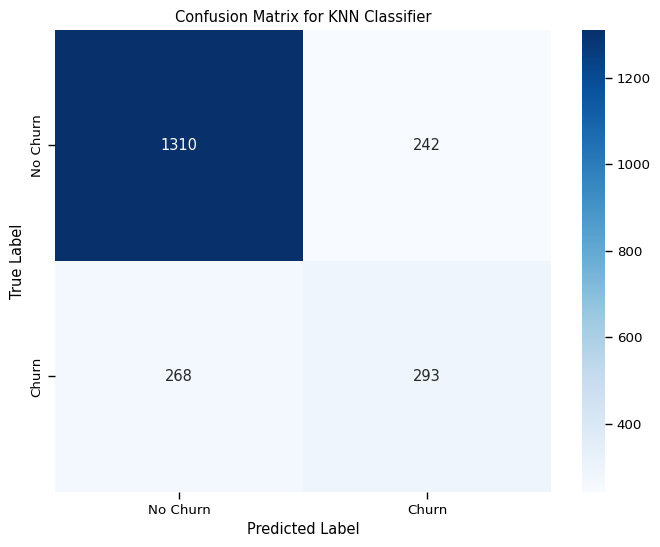

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_y)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

In [ ]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7917652626597255


In [ ]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.64      0.51      0.56       561

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



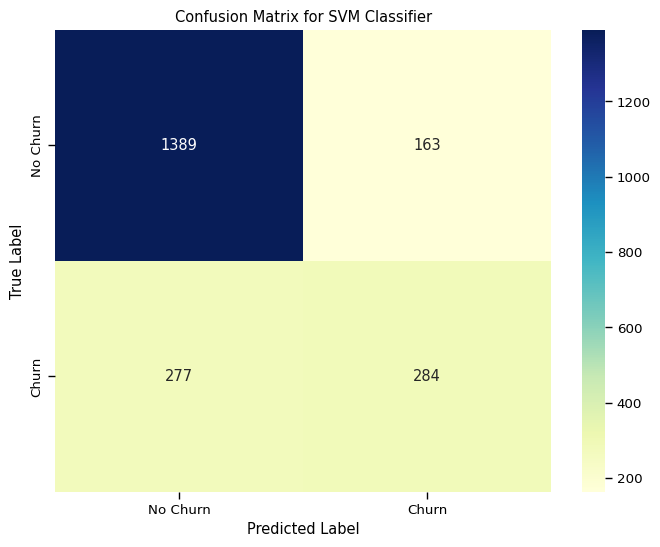

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predict_y)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

In [ ]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
accuracy_rf=  model_rf.score(X_test,y_test)
print ("Random Forest accuracy is :",accuracy_rf)

Random Forest accuracy is : 0.7979176526265973


In [ ]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1552
           1       0.66      0.50      0.57       561

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



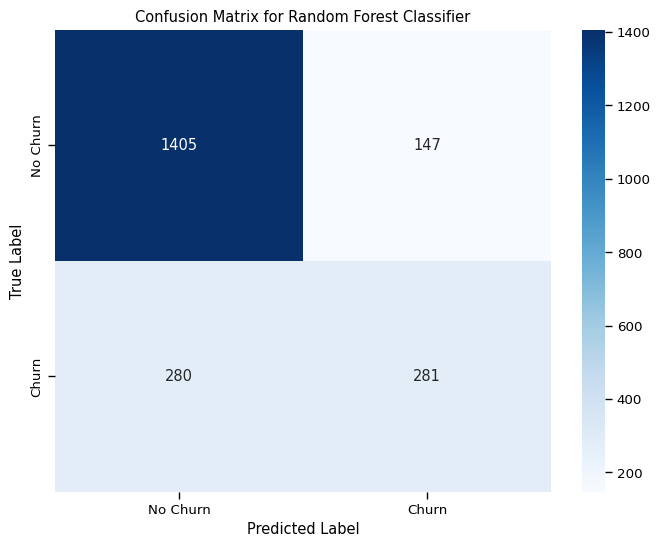

In [ ]:
# Generate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, prediction_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()





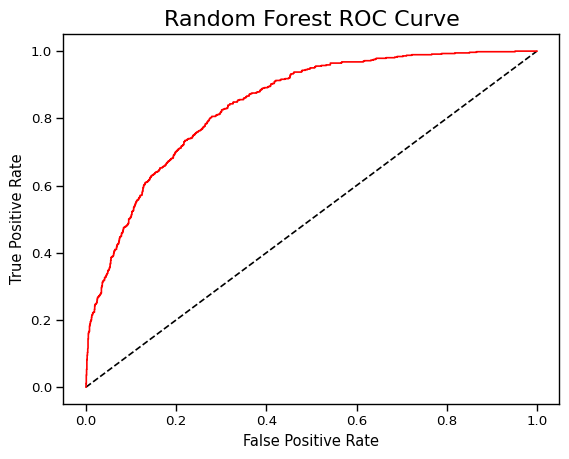

In [ ]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7884524372929484


In [ ]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1552
           1       0.61      0.57      0.59       561

    accuracy                           0.79      2113
   macro avg       0.73      0.72      0.72      2113
weighted avg       0.78      0.79      0.79      2113



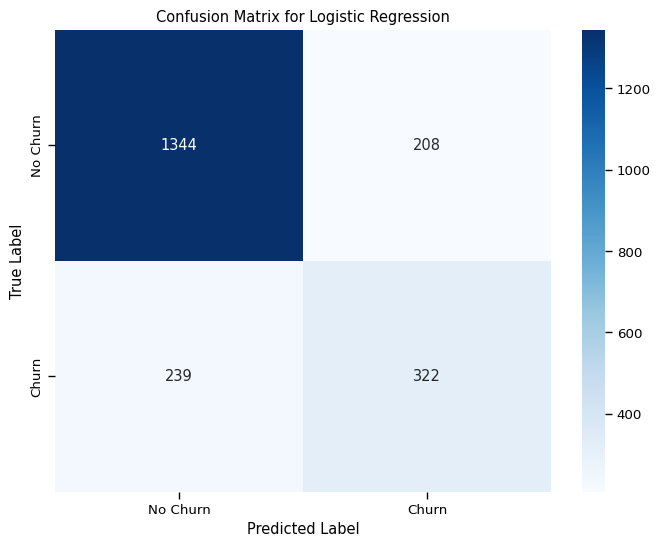

In [ ]:
# Generate confusion matrix
conf_matrix_lr = confusion_matrix(y_test, lr_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


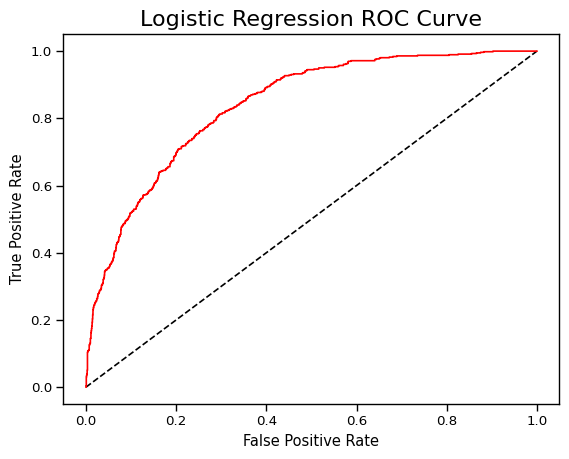

In [ ]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7221959299574066


In [ ]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1552
           1       0.48      0.54      0.51       561

    accuracy                           0.72      2113
   macro avg       0.65      0.66      0.66      2113
weighted avg       0.73      0.72      0.73      2113



In [ ]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.792238523426408

In [ ]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1552
           1       0.63      0.54      0.58       561

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113



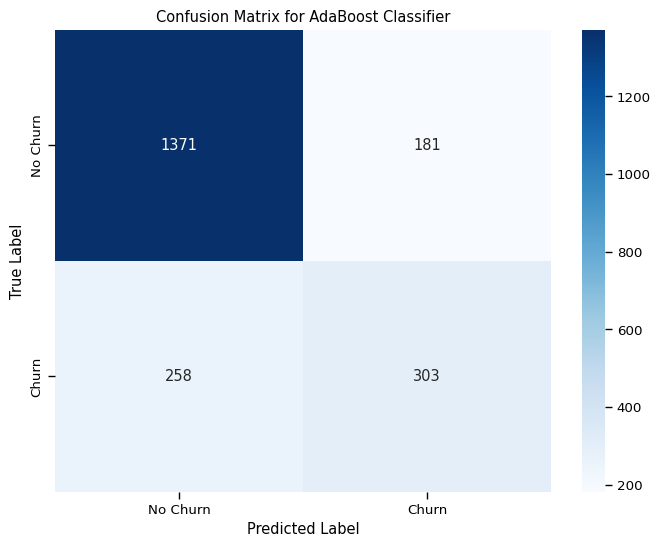

In [ ]:
# Generate confusion matrix
conf_matrix_ada = confusion_matrix(y_test, a_preds)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))


Gradient Boosting Classifier 0.7941315664931378


In [ ]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1552
           1       0.63      0.55      0.59       561

    accuracy                           0.79      2113
   macro avg       0.74      0.72      0.72      2113
weighted avg       0.79      0.79      0.79      2113



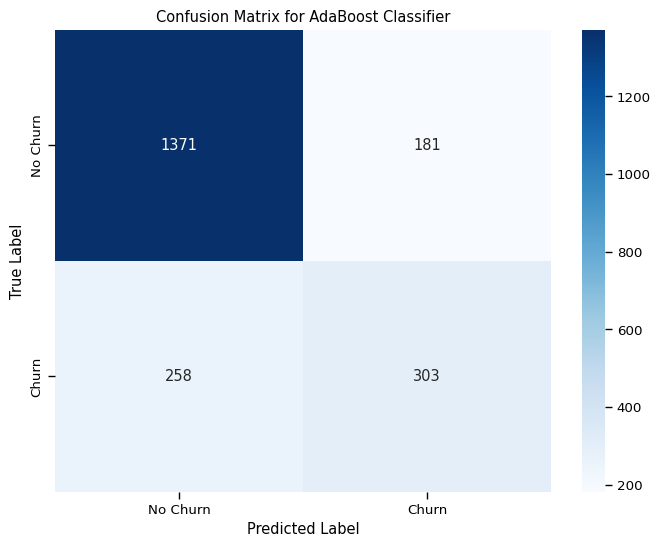

In [ ]:
# Generate confusion matrix
conf_matrix_ada = confusion_matrix(y_test, a_preds)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()


In [ ]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
vc_accuracy=accuracy_score(y_test, predictions)
print("Final Accuracy Score ")
print(vc_accuracy)


Final Accuracy Score 
0.7983909133932797


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1552
           1       0.63      0.58      0.60       561

    accuracy                           0.80      2113
   macro avg       0.74      0.73      0.73      2113
weighted avg       0.79      0.80      0.80      2113



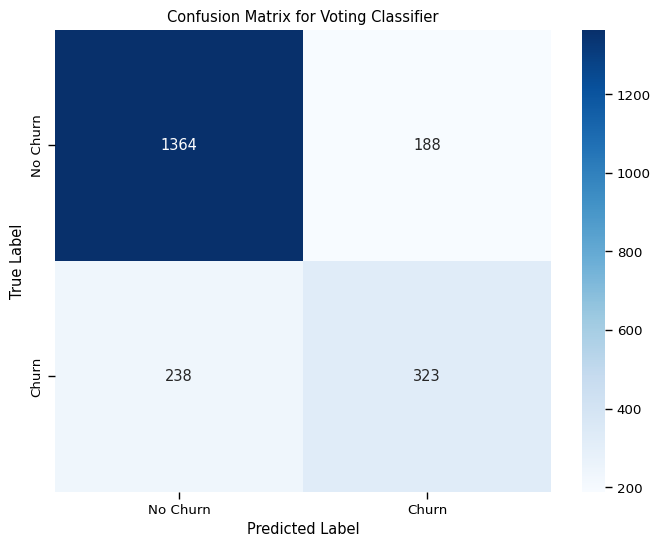

In [ ]:
# Generate confusion matrix
conf_matrix_voting = confusion_matrix(y_test, predictions)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_voting, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

catboost_model = CatBoostClassifier(verbose=0)
catboost_model.fit(X_train, y_train)
catboost_pred = catboost_model.predict(X_test)
catboost_accuracy = accuracy_score(y_test, catboost_pred)

print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"CatBoost Accuracy: {catboost_accuracy:.4f}")


XGBoost Accuracy: 0.7861
CatBoost Accuracy: 0.8008


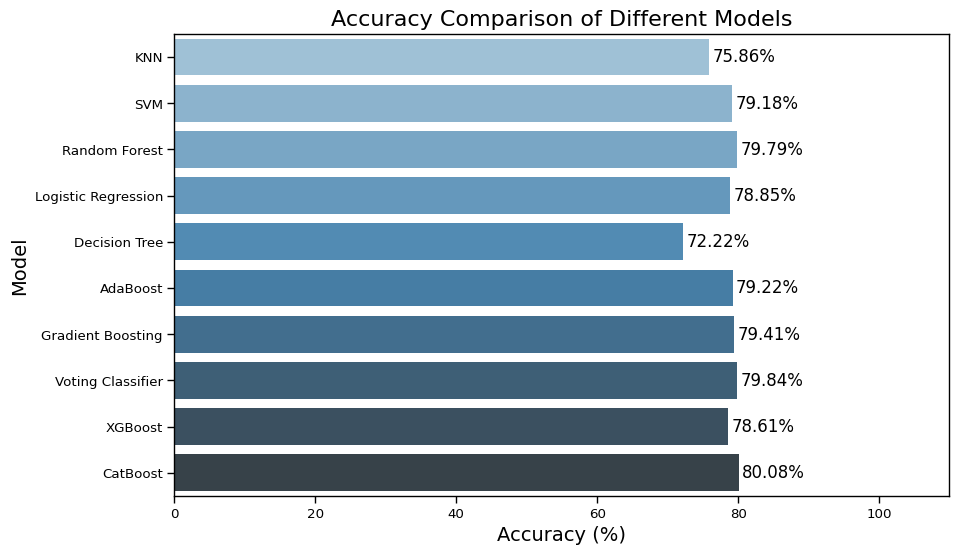

In [ ]:
# Store the model names and accuracies (in percentage)
models = ['KNN', 'SVM', 'Random Forest', 'Logistic Regression', 'Decision Tree', 'AdaBoost', 'Gradient Boosting', 'Voting Classifier','XGBoost','CatBoost']
accuracies = [accuracy_knn, accuracy_svc, accuracy_rf, accuracy_lr, accuracy_dt, metrics.accuracy_score(y_test, a_preds), accuracy_score(y_test, gb_pred), accuracy_score(y_test, predictions), xgb_accuracy, catboost_accuracy]

# Convert accuracies to percentage
accuracies_percentage = [round(accuracy * 100, 2) for accuracy in accuracies]

# Create a DataFrame for easy plotting
accuracy_df = pd.DataFrame({
    'Model': models,
    'Accuracy (%)': accuracies_percentage
})

# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Accuracy (%)', y='Model', data=accuracy_df, palette='Blues_d')

# Annotate each bar with the percentage value
for index, value in enumerate(accuracies_percentage):
    ax.text(value + 0.5, index, f"{value}%", color='black', va='center', fontsize=12)

plt.title('Accuracy Comparison of Different Models', fontsize=16)
plt.xlabel('Accuracy (%)', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.xlim(0, 110)  # Set the x-axis limit for better spacing
plt.show()




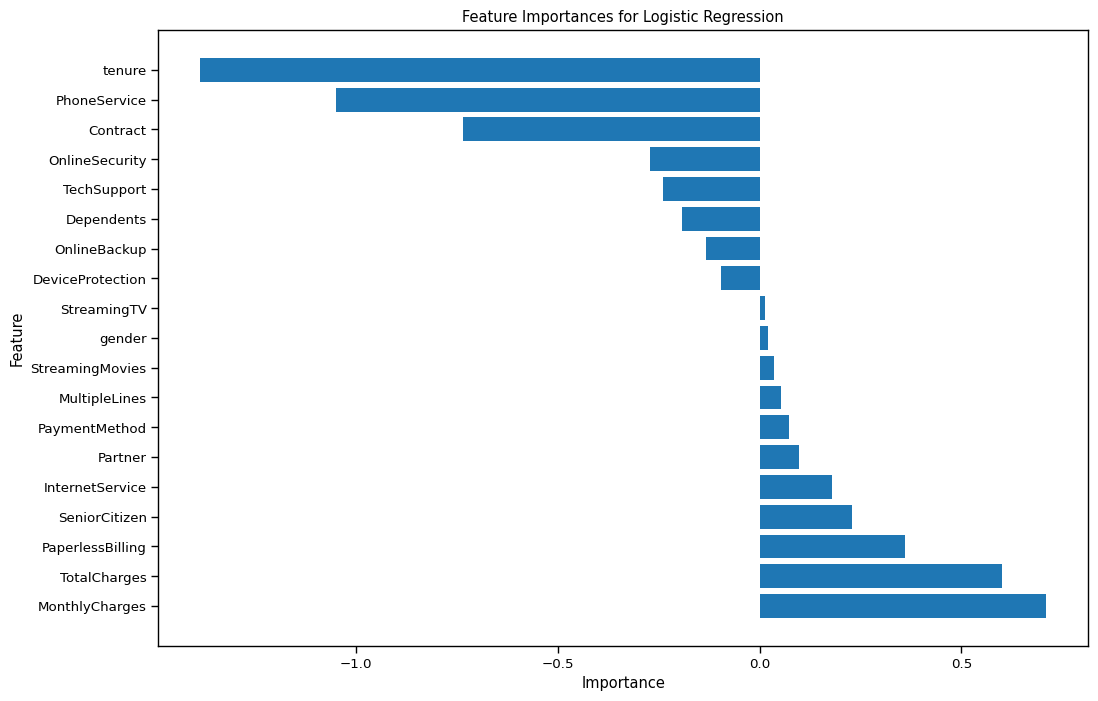

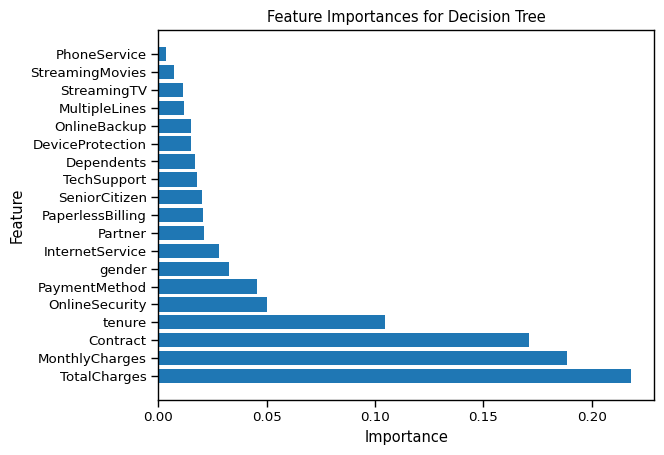

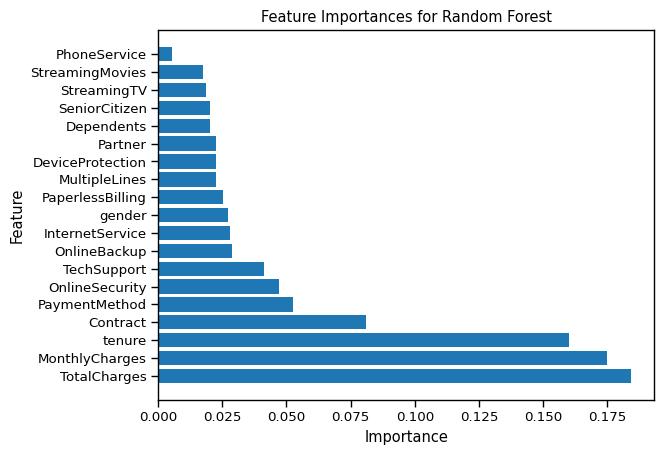

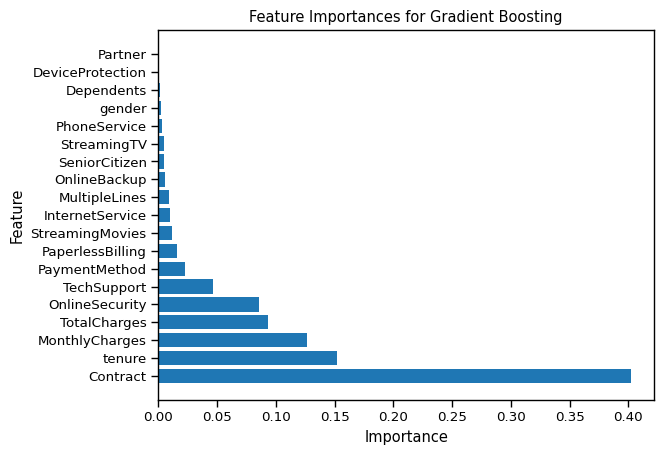

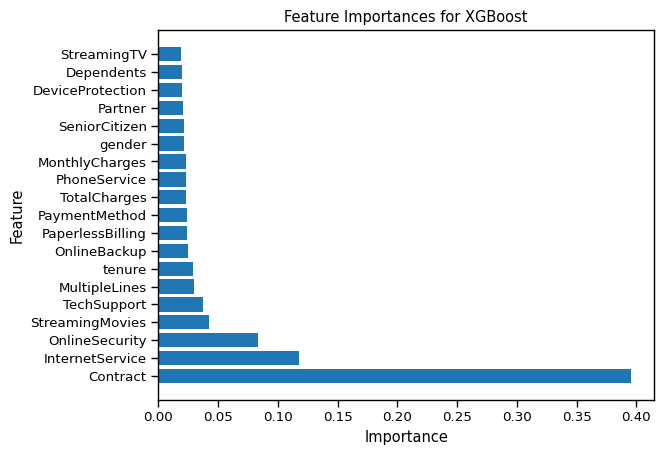

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Assuming you know the feature names or you can pass them directly
feature_names = [ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn',]

# List of models and their names
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42))
]

# Store feature importances or coefficients for each model
feature_importances = {}

# Train each model and collect feature importances or coefficients
for model_name, model in models:
    model.fit(X_train, y_train)
    if hasattr(model, 'feature_importances_'):  # Check if the model has this attribute
        feature_importances[model_name] = model.feature_importances_
    elif hasattr(model, 'coef_'):  # For Logistic Regression and Linear Regression
        feature_importances[model_name] = model.coef_.flatten()
    else:
        print(f"{model_name} does not have feature_importances_ or coef_ attribute")

# Plot the feature importances for each model
plt.figure(figsize=(12, 8))

# Loop over each model and its feature importances
for model_name, importances in feature_importances.items():
    # Sort features by importance/coefficients
    indices = np.argsort(importances)[::-1]  # Sort in descending order
    plt.barh(range(len(importances)), importances[indices], align="center")

    # Use feature_names if available, otherwise use default indices
    plt.yticks(range(len(importances)), np.array(feature_names)[indices])  # Label with feature names or indices
    plt.title(f"Feature Importances for {model_name}")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a KNN model
knn = KNeighborsClassifier()

# Grid Search
grid_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, scoring='accuracy')
grid_knn.fit(X_train, y_train)

# Best Parameters and Accuracy
print("Best Parameters for KNN:", grid_knn.best_params_)
print("Best Accuracy for KNN:", grid_knn.best_score_)

# Evaluate on test set
best_knn = grid_knn.best_estimator_
accuracy_knn_test = best_knn.score(X_test, y_test)
print("Test Set Accuracy for KNN:", accuracy_knn_test)


Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Best Accuracy for KNN: 0.7878296146044624
Test Set Accuracy for KNN: 0.7671557027922385


In [ ]:
from sklearn.svm import SVC

# Define the parameter grid for SVM
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Create an SVM model
svc = SVC(random_state=1)

# Grid Search
grid_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, cv=5, n_jobs=-1, scoring='accuracy')
grid_svc.fit(X_train, y_train)

# Best Parameters and Accuracy
print("Best Parameters for SVM:", grid_svc.best_params_)
print("Best Accuracy for SVM:", grid_svc.best_score_)

# Evaluate on test set
best_svc = grid_svc.best_estimator_
accuracy_svc_test = best_svc.score(X_test, y_test)
print("Test Set Accuracy for SVM:", accuracy_svc_test)


Best Parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy for SVM: 0.8012170385395537
Test Set Accuracy for SVM: 0.7870326549929011


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a Random Forest model
rf = RandomForestClassifier(random_state=50)

# Grid Search
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# Best Parameters and Accuracy
print("Best Parameters for Random Forest:", grid_rf.best_params_)
print("Best Accuracy for Random Forest:", grid_rf.best_score_)

# Evaluate on test set
best_rf = grid_rf.best_estimator_
accuracy_rf_test = best_rf.score(X_test, y_test)
print("Test Set Accuracy for Random Forest:", accuracy_rf_test)


Best Parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Accuracy for Random Forest: 0.8046653144016227
Test Set Accuracy for Random Forest: 0.7969711310932324


In [ ]:
from xgboost import XGBClassifier

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(random_state=42)

grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, n_jobs=-1, scoring='accuracy')
grid_xgb.fit(X_train, y_train)

print("Best Parameters for XGBoost:", grid_xgb.best_params_)
print("Best Accuracy for XGBoost:", grid_xgb.best_score_)

best_xgb = grid_xgb.best_estimator_
accuracy_xgb_test = best_xgb.score(X_test, y_test)
print("Test Set Accuracy for XGBoost:", accuracy_xgb_test)


Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best Accuracy for XGBoost: 0.8064908722109534
Test Set Accuracy for XGBoost: 0.7993374349266446


In [ ]:
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],   # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Solvers
    'max_iter': [100, 200, 500]
}

# Create a Logistic Regression model
lr = LogisticRegression(random_state=42)

# Grid Search
grid_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, n_jobs=-1, scoring='accuracy')
grid_lr.fit(X_train, y_train)

# Best Parameters and Accuracy
print("Best Parameters for Logistic Regression:", grid_lr.best_params_)
print("Best Accuracy for Logistic Regression:", grid_lr.best_score_)

# Evaluate on test set
best_lr = grid_lr.best_estimator_
accuracy_lr_test = best_lr.score(X_test, y_test)
print("Test Set Accuracy for Logistic Regression:", accuracy_lr_test)


Best Parameters for Logistic Regression: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy for Logistic Regression: 0.8066937119675458
Test Set Accuracy for Logistic Regression: 0.7908187411263606


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Grid Search
grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, n_jobs=-1, scoring='accuracy')
grid_dt.fit(X_train, y_train)

# Best Parameters and Accuracy
print("Best Parameters for Decision Tree:", grid_dt.best_params_)
print("Best Accuracy for Decision Tree:", grid_dt.best_score_)

# Evaluate on test set
best_dt = grid_dt.best_estimator_
accuracy_dt_test = best_dt.score(X_test, y_test)
print("Test Set Accuracy for Decision Tree:", accuracy_dt_test)


Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Accuracy for Decision Tree: 0.7807302231237323
Test Set Accuracy for Decision Tree: 0.7647893989588264


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Define the parameter grid for AdaBoost
param_grid_ab = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5, 1, 1.5],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Create an AdaBoost model
ab = AdaBoostClassifier(random_state=42)

# Grid Search
grid_ab = GridSearchCV(estimator=ab, param_grid=param_grid_ab, cv=5, n_jobs=-1, scoring='accuracy')
grid_ab.fit(X_train, y_train)

# Best Parameters and Accuracy
print("Best Parameters for AdaBoost:", grid_ab.best_params_)
print("Best Accuracy for AdaBoost:", grid_ab.best_score_)

# Evaluate on test set
best_ab = grid_ab.best_estimator_
accuracy_ab_test = best_ab.score(X_test, y_test)
print("Test Set Accuracy for AdaBoost:", accuracy_ab_test)


Best Parameters for AdaBoost: {'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 200}
Best Accuracy for AdaBoost: 0.8064908722109532
Test Set Accuracy for AdaBoost: 0.7969711310932324


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Create base models
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Create the Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', lr), ('dt', dt), ('rf', rf)], voting='soft')

# Define the parameter grid for Voting Classifier
param_grid_vc = {
    'lr__C': [0.01, 0.1, 1],
    'dt__max_depth': [10, 20, None],
    'rf__n_estimators': [100, 200, 500]
}

# Grid Search
grid_vc = GridSearchCV(estimator=voting_clf, param_grid=param_grid_vc, cv=5, n_jobs=-1, scoring='accuracy')
grid_vc.fit(X_train, y_train)

# Best Parameters and Accuracy
print("Best Parameters for Voting Classifier:", grid_vc.best_params_)
print("Best Accuracy for Voting Classifier:", grid_vc.best_score_)

# Evaluate on test set
best_vc = grid_vc.best_estimator_
accuracy_vc_test = best_vc.score(X_test, y_test)
print("Test Set Accuracy for Voting Classifier:", accuracy_vc_test)


Best Parameters for Voting Classifier: {'dt__max_depth': 10, 'lr__C': 0.1, 'rf__n_estimators': 500}
Best Accuracy for Voting Classifier: 0.7890466531440163
Test Set Accuracy for Voting Classifier: 0.7841930903928065


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_gb = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_grid_gb,
    n_iter=20,  # Number of random combinations to try
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    random_state=42
)

random_gb.fit(X_train, y_train)

# Best Parameters and Accuracy
print("Best Parameters for Gradient Boosting:", random_gb.best_params_)
print("Best Accuracy for Gradient Boosting:", random_gb.best_score_)

# Evaluate on test set
best_gb = random_gb.best_estimator_
accuracy_gb_test = best_gb.score(X_test, y_test)
print("Test Set Accuracy for Gradient Boosting:", accuracy_gb_test)


Best Parameters for Gradient Boosting: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.01}
Best Accuracy for Gradient Boosting: 0.7991886409736308
Test Set Accuracy for Gradient Boosting: 0.7988641741599621


In [ ]:
# Define the parameter distribution for CatBoost
param_dist_catboost = {
    'iterations': [200, 300, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'depth': [4, 5, 6, 7, 8],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128]
}

# Initialize CatBoost model
catboost = CatBoostClassifier(verbose=0)

# Perform RandomizedSearchCV for CatBoost
random_catboost = RandomizedSearchCV(estimator=catboost, param_distributions=param_dist_catboost,
                                      n_iter=10, cv=5, n_jobs=-1, scoring='accuracy', random_state=42)

random_catboost.fit(X_train, y_train)

# Best parameters and accuracy for CatBoost
print("Best Parameters for CatBoost (RandomizedSearchCV):", random_catboost.best_params_)
print("Best Accuracy for CatBoost (RandomizedSearchCV):", random_catboost.best_score_)

# Get the best optimized CatBoost model
best_catboost_random = random_catboost.best_estimator_

# Use optimized CatBoost model for predictions
catboost_pred_optimized = best_catboost_random.predict(X_test)

# Optimized accuracy for CatBoost
catboost_accuracy_optimized = accuracy_score(y_test, catboost_pred_optimized)
print("Optimized Accuracy for CatBoost (RandomizedSearchCV):", catboost_accuracy_optimized)



Best Parameters for CatBoost (RandomizedSearchCV): {'learning_rate': 0.01, 'l2_leaf_reg': 3, 'iterations': 200, 'depth': 7, 'border_count': 128}
Best Accuracy for CatBoost (RandomizedSearchCV): 0.8054766734279919
Optimized Accuracy for CatBoost (RandomizedSearchCV): 0.7993374349266446


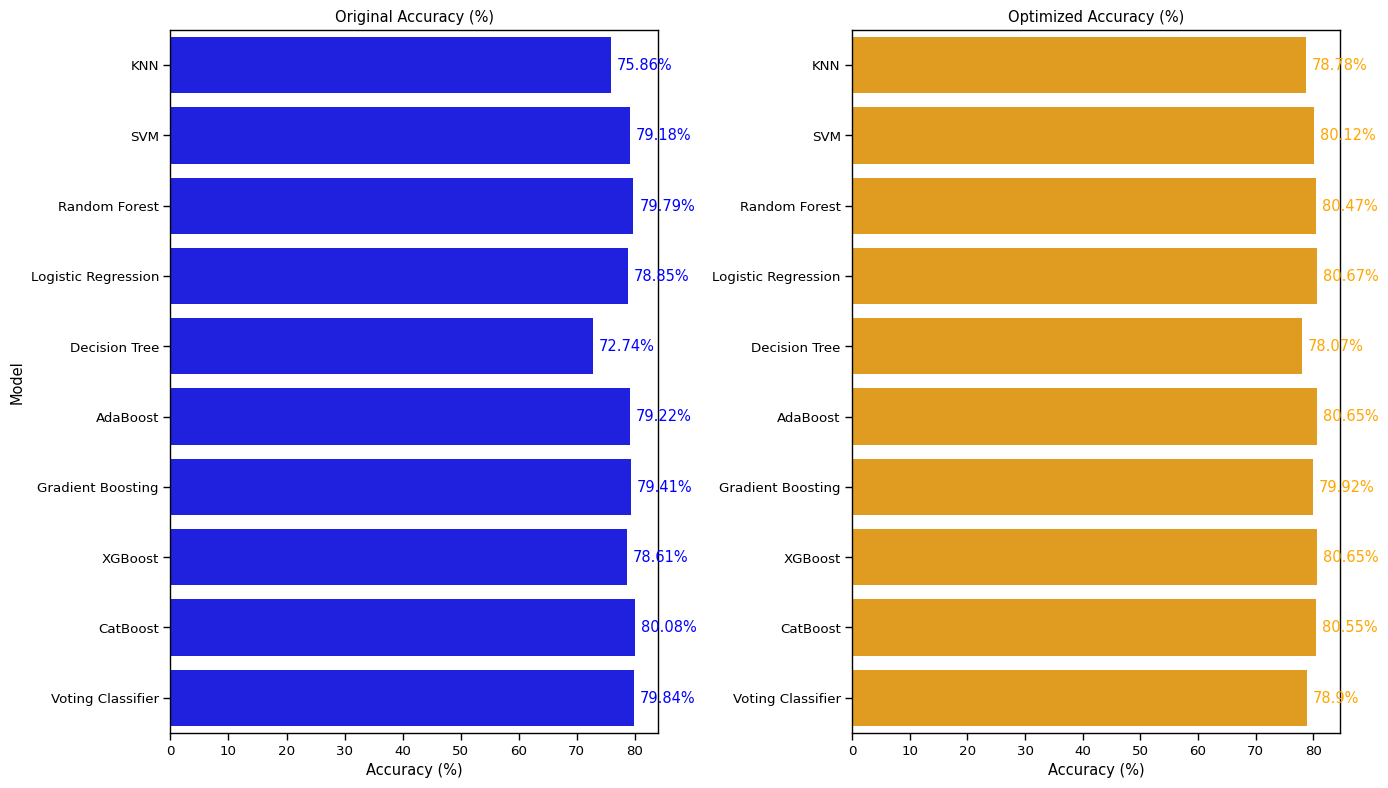

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Original Accuracies
original_accuracies = {
    'KNN': accuracy_knn,
    'SVM': accuracy_svc,
    'Random Forest': accuracy_rf,
    'Logistic Regression': accuracy_lr,
    'Decision Tree': accuracy_dt,
    'AdaBoost': metrics.accuracy_score(y_test, a_preds),
    'Gradient Boosting': accuracy_score(y_test, gb_pred),
    'XGBoost': xgb_accuracy,
    'CatBoost': catboost_accuracy,
    'Voting Classifier': vc_accuracy  # Add Voting Classifier to original accuracies
}

# Optimized Accuracies
optimized_accuracies = {
    'KNN': grid_knn.best_score_,
    'SVM': grid_svc.best_score_,
    'Random Forest': grid_rf.best_score_,
    'Logistic Regression': grid_lr.best_score_,
    'XGBoost': grid_xgb.best_score_,
    'Voting Classifier': grid_vc.best_score_,
    'Decision Tree': grid_dt.best_score_,
    'AdaBoost': grid_ab.best_score_,
    'Gradient Boosting': random_gb.best_score_,
    'CatBoost': random_catboost.best_score_
}

# Convert accuracies to percentages
original_accuracies_percentage = [round(accuracy * 100, 2) for accuracy in original_accuracies.values()]
optimized_accuracies_percentage = [round(optimized_accuracies.get(model, 0) * 100, 2) for model in original_accuracies.keys()]

# Create a DataFrame for plotting
accuracy_df = pd.DataFrame({
    'Model': list(original_accuracies.keys()),
    'Original Accuracy (%)': original_accuracies_percentage,
    'Optimized Accuracy (%)': optimized_accuracies_percentage
})

# Plotting side-by-side bar charts using subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# Plot Original Accuracies on the first subplot
sns.barplot(x='Original Accuracy (%)', y='Model', data=accuracy_df, color='blue', ax=axes[0], orient='h')
axes[0].set_title('Original Accuracy (%)')
axes[0].set_xlabel('Accuracy (%)')
axes[0].set_ylabel('Model')

# Add percentage annotations for Original Accuracy
for index, row in accuracy_df.iterrows():
    axes[0].text(row['Original Accuracy (%)'] + 1, index, f"{row['Original Accuracy (%)']}%", color='blue', va='center')

# Plot Optimized Accuracies on the second subplot
sns.barplot(x='Optimized Accuracy (%)', y='Model', data=accuracy_df, color='orange', ax=axes[1], orient='h')
axes[1].set_title('Optimized Accuracy (%)')
axes[1].set_xlabel('Accuracy (%)')
axes[1].set_ylabel('')

# Add percentage annotations for Optimized Accuracy
for index, row in accuracy_df.iterrows():
    axes[1].text(row['Optimized Accuracy (%)'] + 1, index, f"{row['Optimized Accuracy (%)']}%", color='orange', va='center')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.4 MB/s eta 0:00:00


In [ ]:
import optuna
import lightgbm as lgb
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier, plot_importance
from catboost import CatBoostClassifier




#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import shap

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score

accuracy= []
recall =[]
roc_auc= []
precision = []


df = pd.read_csv('/content/Telco-Customer-Churn.csv')
df1 = df.drop(['customerID','gender','PhoneService'],axis=1).copy()
le = LabelEncoder()
df1['Churn']=le.fit_transform(df1['Churn'])

df1['tenure']= df1['tenure'].astype(float)
df1['TotalCharges']= df1['TotalCharges'].apply(lambda x: x if x!= ' ' else np.nan).astype(float)

df1[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]= df1[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].replace('No internet service','No')


X= df1.drop('Churn', axis=1)
y= df1['Churn']

categorical_features_indices = np.where(X.dtypes != float)[0]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

catboost_5 = CatBoostClassifier(verbose=False,random_state=0,scale_pos_weight=5)

catboost_5.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test))
y_pred = catboost_5.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['Catboost_adjusted_weight_5']
result_df3 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df3

,Accuracy,Recall,Roc_Auc,Precision
Catboost_adjusted_weight_5,0.6796,0.9181,0.7544,0.4555


In [ ]:
explainercat = shap.TreeExplainer(catboost_5)
shap_values_cat_test = explainercat.shap_values(X_test)
shap_values_cat_train = explainercat.shap_values(X_train)

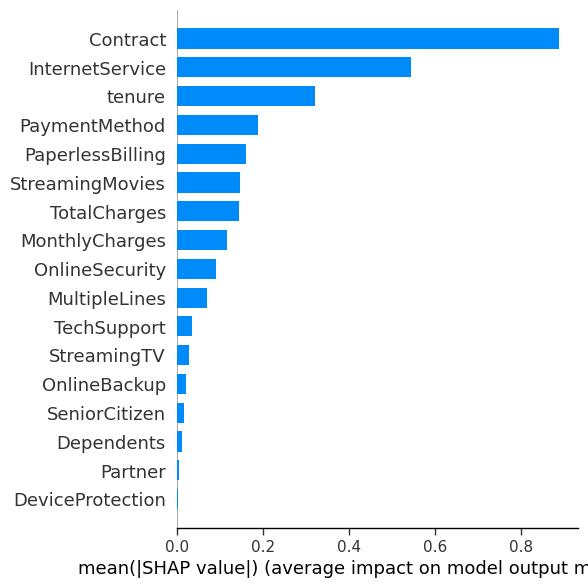

In [ ]:
shap.summary_plot(shap_values_cat_train, X_train, plot_type="bar",plot_size=(6,6))

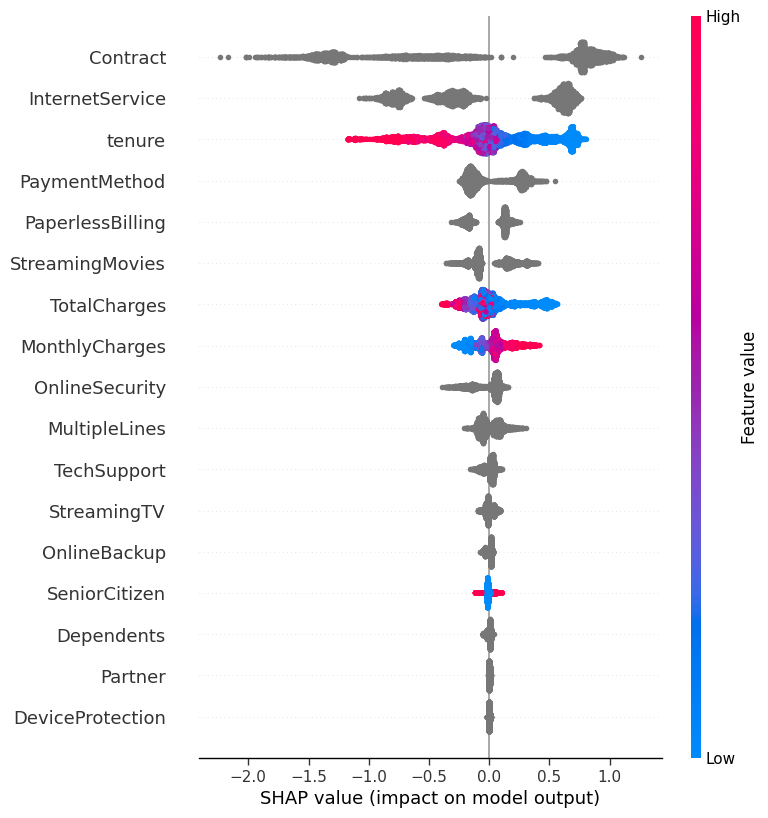

In [ ]:
fig = plt.subplots(figsize=(5,5),dpi=100)

ax = shap.summary_plot(shap_values_cat_train, X_train,plot_type="dot")

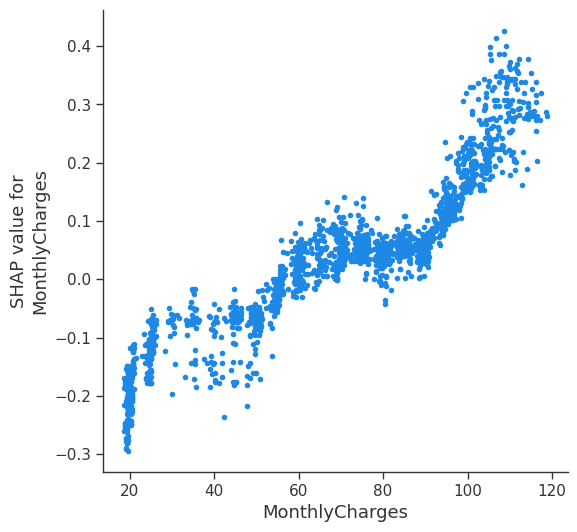

In [ ]:
fig, ax1= plt.subplots(figsize=(6,6),dpi=100)

shp_plt = shap.dependence_plot("MonthlyCharges", shap_values_cat_test,X_test,ax=ax1, interaction_index=None)

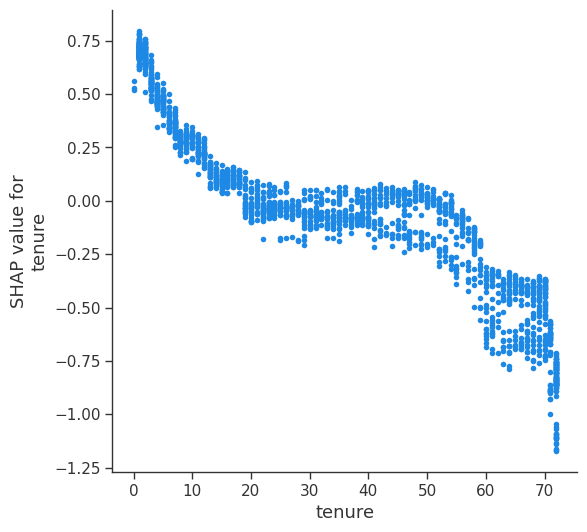

In [ ]:
fig, ax2 = plt.subplots(figsize=(6,6),dpi=100)
shap.dependence_plot("tenure", shap_values_cat_test, X_test,interaction_index=None,ax=ax2)

In [ ]:
print(f'Expected Value-Base Value: {explainercat.expected_value}')

Expected Value-Base Value: -0.1755238478753252


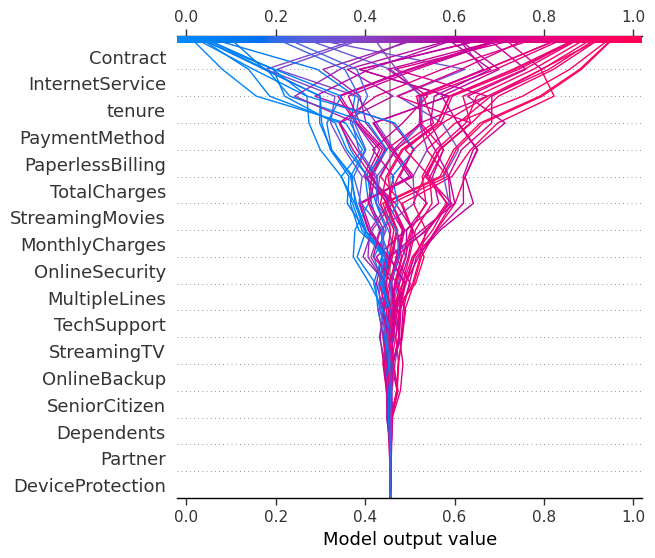

In [ ]:
fig = plt.subplots(figsize=(6,6),dpi=100)
ax_1= shap.decision_plot(explainercat.expected_value, shap_values_cat_test[:50], X_test.iloc[:50],auto_size_plot=False, link= "logit")

In [ ]:
X_test.iloc[15]

,6179
SeniorCitizen,1
Partner,No
Dependents,No
tenure,11.0
MultipleLines,Yes
InternetService,Fiber optic
OnlineSecurity,No
OnlineBackup,No
DeviceProtection,No
TechSupport,No


#####Customer 15:


*   Senior citizen
*   Has Month to month contract
*   11 month tenure with the company
*   Monthly charges is 95.15 $ and Total charges is around 1K
*   Does not have any partner or dependent
*   Internet service is Fiber optic
*   No device protection, no online security, no tech support



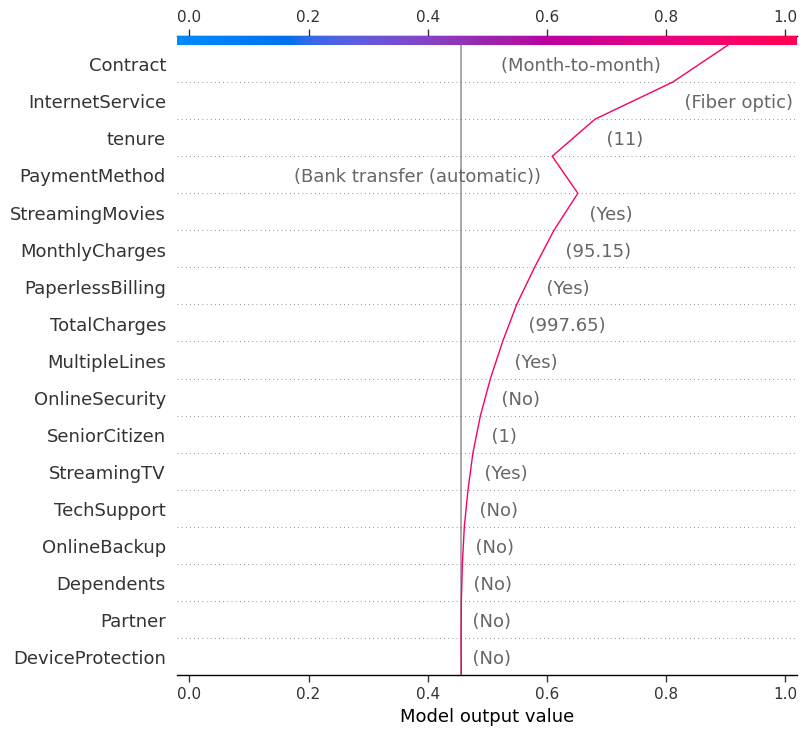

In [ ]:
fig = plt.subplots(figsize=(6,6),dpi=100)
ax_2= shap.decision_plot(explainercat.expected_value, shap_values_cat_test[15], X_test.iloc[[15]], link= "logit")

In [ ]:
Model starts with the expected value – the average predicted probability: 0.4562.
Being senior citizen, doesn't have an online security services, having a multiple lines with the company, 1K total charges, paperless billing slightly increase probability of the churn.
Monthly charges with 95.15 US Dollars and having Streaming TV services have medium level effects on the increasing the probability of the churn.
On the other hand payment method as a bank transfer automatic has effect on the decreasing the probability of the churn decision.
Being 11 months tenure with the company and having Fiber internet service with the company have signigicantly increase the probability of the churn.
From decision plot, it is seen that having month-to-month contract with the company has the most signigicant effect on the increasing the probability of the churn decision in this model for this specific customer

In [ ]:

print(f'Customer 15: Actual value for the Customer Churn : {y_test.iloc[15]}')
print(f"Customer 15: CatBoost Model's prediction for the Customer Churn : {y_pred[15]}")

Customer 15: Actual value for the Customer Churn : 1
Customer 15: CatBoost Model's prediction for the Customer Churn : 1


In [ ]:
shap.initjs()
shap.force_plot(explainercat.expected_value, shap_values_cat_test[:50], X_test.iloc[:50],link= "logit")

In [ ]:
shap.initjs()
shap.force_plot(explainercat.expected_value, shap_values_cat_test[15], X_test.iloc[[15]],link= "logit")

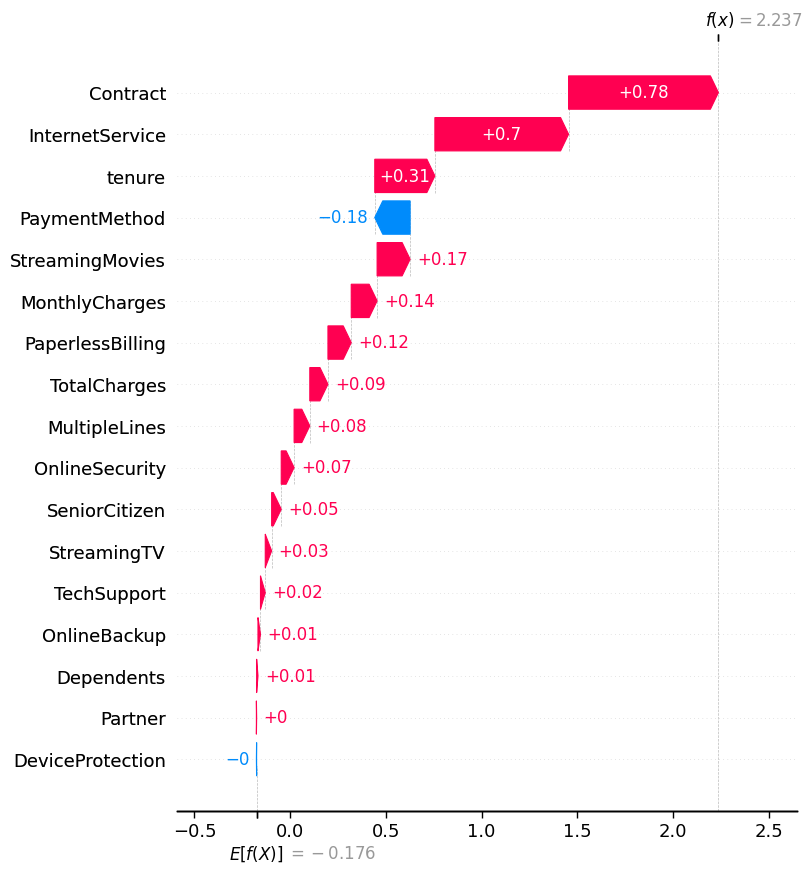

In [ ]:
fig = plt.subplots(figsize=(6,6),dpi=100)
ax_3= shap.plots._waterfall.waterfall_legacy(explainercat.expected_value, shap_values_cat_test[15], feature_names = X_test.columns,max_display = 20)

In [ ]:
SHAP (SHapley Additive exPlanations) is a method to explain individual predictions.¶
SHAP summary plot gives in detail info by combining feature importance with its effects.
SHAP Decison Plot gives us a clear picture of how models, in our case how complex models, reach their decisions.
SHAP Force Plot: We can visualize feature attributions such as Shapley values as “forces”. Each feature value is a force that either increases or decreases the prediction.
SHAP Waterfall plots are designed to display explanations for individual predictions, so they expect a single row of an Explanation object as input.